In [1]:
import autograd.numpy as np
import autograd.numpy.random as npr
npr.seed(0)

import ssm
from ssm.util import find_permutation
from ssm.plots import gradient_cmap, white_to_color_cmap

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

color_names = [
    "windows blue",
    "red",
    "amber",
    "faded green",
    "dusty purple",
    "orange"
    ]

colors = sns.xkcd_palette(color_names)
cmap = gradient_cmap(colors)


# Speficy whether or not to save figures
save_figures = True

In [2]:
def generate_switch_world(prob, ntrials):
    '''
    Generate a world with defined number of trials
    ntrials: an array of num trials in each block
    prob: probability of reward in each block
    '''
    assert len(prob) == len(ntrials)
    targets = []
    truestates = []
    for i in range(len(prob)):
        probi = prob[i]
        ntrialsi = ntrials[i]
        truestate_i = [probi] * ntrialsi
        targets += list(np.random.rand(ntrialsi) < probi)
        truestates += list(truestate_i)
        
    
    return np.array(truestates), np.array(targets)[:,None]

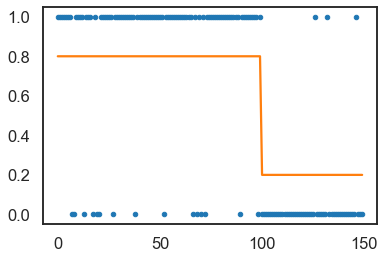

In [3]:
truestates, obs = generate_switch_world([0.8, 0.2, 0.8, 0.2], [100, 150, 130, 120])
plt.plot(obs[:150], '.')
plt.plot(truestates[:150])